In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

In [3]:
Achilles_gene_dependency = tc.get(name='public-19q4-93d9', version=23, file='Achilles_gene_dependency')

In [4]:
gene_dependency_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_dependency')

In [5]:
gene_dependency_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_dependency')

In [6]:
Achilles_gene_dependency.columns = Achilles_gene_dependency.columns.str.split(' ').str[0]

gene_dependency_drive.columns = gene_dependency_drive.columns.str.split(' ').str[0]

gene_dependency_achilles.columns = gene_dependency_achilles.columns.str.split(' ').str[0]

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


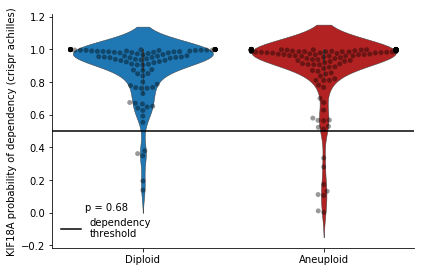

In [7]:
shared = set(anot.index) & set(Achilles_gene_dependency.index)
temp = Achilles_gene_dependency.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)

plt.axhline(.5,color='black',label='dependency\nthreshold')


from scipy import stats
tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A'].dropna(),temp.loc[falsee,'KIF18A'].dropna())
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A probability of dependency (crispr achilles)')
plt.xlabel('')
plt.tight_layout()

plt.savefig('review_plots/dependency_crispr_achilles_NEW.pdf')

In [7]:
print('CRISPR achilles\n')

print('aneuploid:')
print('dependent: ' + str(len(temp.loc[trus,'KIF18A'][temp.loc[trus,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[trus,'KIF18A'].dropna())))

print()

print('diploid:')
print('dependent: ' + str(len(temp.loc[falsee,'KIF18A'][temp.loc[falsee,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[falsee,'KIF18A'].dropna())))

CRISPR achilles

aneuploid:
dependent: 147
out of 155

diploid:
dependent: 99
out of 104


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


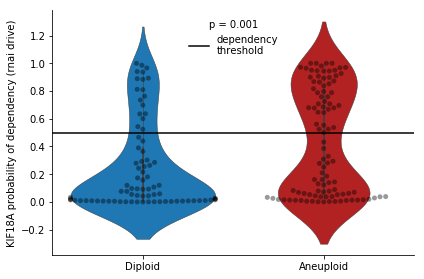

In [15]:
shared = set(anot_CCLE.index) & set(gene_dependency_drive.index)
temp = gene_dependency_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)

plt.axhline(.5,color='black',label='dependency\nthreshold')

from scipy import stats
tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A'].dropna(),temp.loc[falsee,'KIF18A'].dropna())
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False,loc='upper center')
plotting.simpleaxis()
plt.ylabel('KIF18A probability of dependency (rnai drive)')
plt.xlabel('')


plt.tight_layout()

plt.savefig('review_plots/dependency_rnai_drive.pdf')

In [9]:
print('rnai drive \n')

print('aneuploid:')
print('dependent: ' + str(len(temp.loc[trus,'KIF18A'][temp.loc[trus,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[trus,'KIF18A'].dropna())))

print()

print('diploid:')
print('dependent: ' + str(len(temp.loc[falsee,'KIF18A'][temp.loc[falsee,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[falsee,'KIF18A'].dropna())))

rnai drive 

aneuploid:
dependent: 48
out of 102

diploid:
dependent: 18
out of 81


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


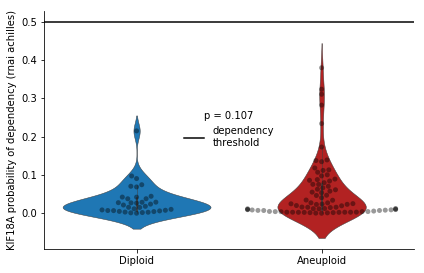

In [17]:
shared = set(anot_CCLE.index) & set(gene_dependency_achilles.index)
temp = gene_dependency_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

sns.violinplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A',x='ploidy', data = temp.loc[:,['KIF18A','ploidy']].dropna(),color='black',alpha=.4,order=my_order)

plt.axhline(.5,color='black',label='dependency\nthreshold')


from scipy import stats
tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A'].dropna(),temp.loc[falsee,'KIF18A'].dropna())
plt.legend(title='p = '+ str(round(p_val,3)),frameon=False)
plotting.simpleaxis()
plt.ylabel('KIF18A probability of dependency (rnai achilles)')
plt.xlabel('')
plt.tight_layout()

plt.savefig('review_plots/dependency_rnai_achilles.pdf')

In [11]:
print('rnai achilles\n')

print('aneuploid:')
print('dependent: ' + str(len(temp.loc[trus,'KIF18A'][temp.loc[trus,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[trus,'KIF18A'].dropna())))

print()
xs
print('diploid:')
print('dependent: ' + str(len(temp.loc[falsee,'KIF18A'][temp.loc[falsee,'KIF18A']>.5])))
print('out of ' + str(len(temp.loc[falsee,'KIF18A'].dropna())))

rnai achilles

aneuploid:
dependent: 0
out of 81

diploid:
dependent: 0
out of 35
